In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("spotify_data.csv")

In [ ]:
df.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4.0,-10.058,1.0,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166.0,3.0
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3.0,-10.286,1.0,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387.0,4.0
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3.0,-13.711,1.0,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960.0,4.0
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10.0,-9.845,1.0,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293.0,4.0
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6.0,-5.419,0.0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320.0,4.0


In [ ]:
df.shape

(187883, 20)

In [ ]:
df.isnull().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
time_signature      1
dtype: int64

In [ ]:
df.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4.0,-10.058,1.0,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166.0,3.0
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3.0,-10.286,1.0,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387.0,4.0
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3.0,-13.711,1.0,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960.0,4.0
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10.0,-9.845,1.0,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293.0,4.0
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6.0,-5.419,0.0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320.0,4.0


In [ ]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,187883.00000,187883.000000,187883.000000,187882.000000,187882.000000,187882.000000,187882.000000,187882.000000,187882.000000,187882.000000,187882.000000,187882.000000,187882.000000,187882.000000,1.878820e+05,187882.000000
mean,93941.00000,18.037502,2013.275512,0.532581,0.655632,5.279633,-8.563265,0.627101,0.094313,0.305971,0.254825,0.227885,0.444208,122.086795,2.547405e+05,3.889564
std,54237.29465,14.282756,1.032978,0.181865,0.265999,3.560015,5.439496,0.483577,0.135203,0.350457,0.363635,0.205652,0.267504,29.557471,1.540643e+05,0.458713
min,0.00000,0.000000,2012.000000,0.000000,0.000000,0.000000,-56.098000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000e+03,0.000000
25%,46970.50000,7.000000,2012.000000,0.412000,0.476000,2.000000,-10.348000,0.000000,0.037100,0.004810,0.000001,0.098000,0.216000,99.993000,1.884670e+05,4.000000
50%,93941.00000,16.000000,2013.000000,0.544000,0.715000,5.000000,-7.079000,1.000000,0.050500,0.120000,0.002560,0.136000,0.420000,122.347500,2.323730e+05,4.000000
75%,140911.50000,27.000000,2014.000000,0.668000,0.882000,8.000000,-5.010000,1.000000,0.088800,0.611000,0.617000,0.301000,0.658000,139.986000,2.925330e+05,4.000000
max,187882.00000,91.000000,2015.000000,0.991000,1.000000,11.000000,6.172000,1.000000,0.969000,0.996000,1.000000,1.000000,1.000000,248.221000,6.000495e+06,5.000000


In [ ]:
df.count()

Unnamed: 0          187883
artist_name         187883
track_name          187883
track_id            187883
popularity          187883
year                187883
genre               187883
danceability        187882
energy              187882
key                 187882
loudness            187882
mode                187882
speechiness         187882
acousticness        187882
instrumentalness    187882
liveness            187882
valence             187882
tempo               187882
duration_ms         187882
time_signature      187882
dtype: int64

In [ ]:
#cleaning dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187883 entries, 0 to 187882
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        187883 non-null  int64  
 1   artist_name       187883 non-null  object 
 2   track_name        187883 non-null  object 
 3   track_id          187883 non-null  object 
 4   popularity        187883 non-null  int64  
 5   year              187883 non-null  int64  
 6   genre             187883 non-null  object 
 7   danceability      187882 non-null  float64
 8   energy            187882 non-null  float64
 9   key               187882 non-null  float64
 10  loudness          187882 non-null  float64
 11  mode              187882 non-null  float64
 12  speechiness       187882 non-null  float64
 13  acousticness      187882 non-null  float64
 14  instrumentalness  187882 non-null  float64
 15  liveness          187882 non-null  float64
 16  valence           18

In [ ]:
df=df.drop(['mode'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187883 entries, 0 to 187882
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        187883 non-null  int64  
 1   artist_name       187883 non-null  object 
 2   track_name        187883 non-null  object 
 3   track_id          187883 non-null  object 
 4   popularity        187883 non-null  int64  
 5   year              187883 non-null  int64  
 6   genre             187883 non-null  object 
 7   danceability      187882 non-null  float64
 8   energy            187882 non-null  float64
 9   key               187882 non-null  float64
 10  loudness          187882 non-null  float64
 11  speechiness       187882 non-null  float64
 12  acousticness      187882 non-null  float64
 13  instrumentalness  187882 non-null  float64
 14  liveness          187882 non-null  float64
 15  valence           187882 non-null  float64
 16  tempo             18

In [ ]:
df.isna().sum()

Unnamed: 0          0
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        1
energy              1
key                 1
loudness            1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
time_signature      1
dtype: int64

In [ ]:
df['artist_name'].unique()

array(['Jason Mraz', 'Joshua Hyslop', 'Boyce Avenue', ..., 'Ecstatic',
       'Crude Intentions', 'Jay Reeve'], dtype=object)

In [ ]:
df.nunique()

Unnamed: 0          187883
artist_name          22653
track_name          162899
track_id            187883
popularity              89
year                     4
genre                   83
danceability          1309
energy                2384
key                     12
loudness             24928
speechiness           1620
acousticness          5375
instrumentalness      5400
liveness              1763
valence               1862
tempo                74377
duration_ms          90340
time_signature           5
dtype: int64

In [ ]:
#chacking dupicate row

In [ ]:
duplicate=df.duplicated(keep=False).sum ()
duplicate

0

In [ ]:
#data visualization


([<matplotlib.patches.Wedge at 0x7dfd76c14850>,
 [Text(-0.1910130855889933, 1.083288512416601, 'ABBA'),
  Text(-0.2252871566787365, -1.076682728121711, 'Zwan'),
  Text(1.0212047982326018, -0.40882852159152416, 'Ziggy Marley')])

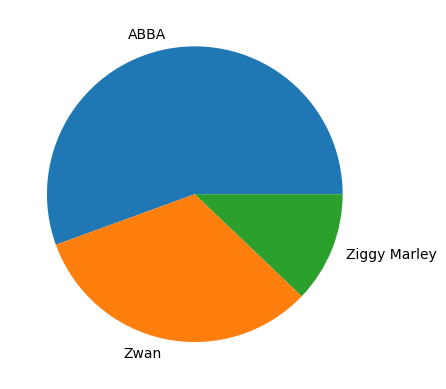

In [ ]:
data = [55,32,12]
key=['ABBA','Zwan','Ziggy Marley']
plt.pie(data,labels=key)

<function matplotlib.pyplot.show(close=None, block=None)>

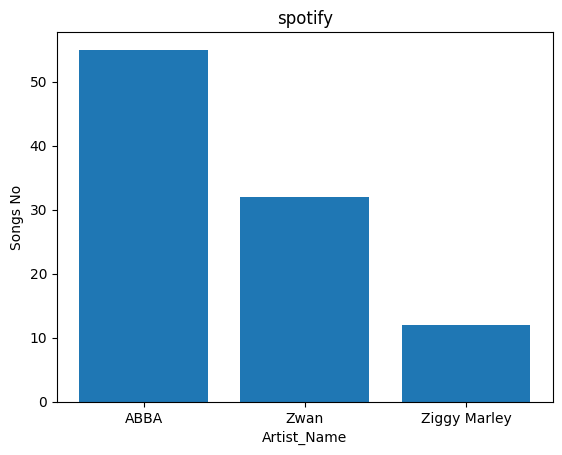

In [ ]:
x = ['ABBA','Zwan','Ziggy Marley']
y=[55,32,12]
plt.bar(x,y)
plt.title('spotify')
plt.xlabel('Artist_Name')
plt.ylabel('Songs No')
plt.show




In [ ]:
#data modeling

X= df[['year']]
Y= df[['popularity']]



In [ ]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
len(X_train)

150306

In [ ]:
len(X_test)

37577

In [ ]:
len(Y_train)

150306

In [ ]:
len(Y_test)

37577

In [ ]:
df.shape

(187883, 19)

In [ ]:
reg=linear_model.LinearRegression()

In [ ]:
X_train.shape

(150306, 1)

In [ ]:
X_test.shape

(37577, 1)

In [ ]:
Y_train.shape

(150306, 1)

In [ ]:
Y_test.shape

(37577, 1)

In [ ]:
reg=linear_model.LinearRegression()


In [ ]:
model= reg.fit(X_train,Y_train)

In [ ]:
Y_pred =model.predict(X_test)

In [ ]:
print ('predicted_response:',Y_pred,sep='\n')

predicted_response:
[[19.12004121]
 [16.20636408]
 [17.66320264]
 ...
 [19.12004121]
 [20.57687977]
 [17.66320264]]


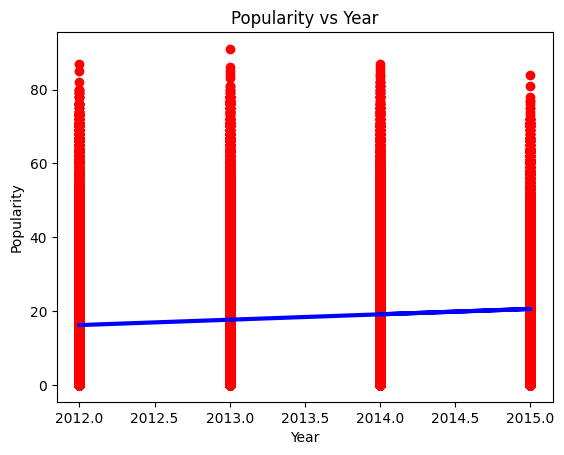

In [ ]:
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, reg.predict(X_train), color='blue', linewidth=3)
plt.title("Popularity vs Year")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
print("mean_sqrd_error is==",mean_squared_error(Y_test,Y_pred))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("r2_score =",r2_score(Y_test,Y_pred))

mean_sqrd_error is== 200.18164536725897
root_mean_squared error of is== 14.148556299752245
r2_score = 0.010643281433127205
